In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
H_BAR = 197.3269804 #In units of MeV*fm
M_PI = (2*139.57039 + 134.9768)/3 #In units of MeV
DELTA_M = 293.1 #In units of MeV

In [3]:
def x(r):
    return M_PI*r/H_BAR

In [4]:
def y(r):
    return DELTA_M*r/H_BAR

In [5]:
def vf2(mu, r):
    return mu**2/np.sqrt(mu**2 + 4*x(r)**2)*np.exp(-np.sqrt(mu**2 + 4*x(r)**2))

In [6]:
def vf1(mu, r):
    return mu**2*vf2(mu, r)

In [7]:
def vf3(mu, r):
    return np.sqrt(mu**2 + 4*x(r)**2)*vf2(mu, r)

In [8]:
def vf4(mu, r):
    return (2*x(r)**2 + mu**2 + 2*y(r)**2)**2/(mu**2 + 4*y(r)**2)*vf2(mu, r)

In [9]:
def vf5(mu, r):
    return mu/np.sqrt(mu**2 + 4*x(r)**2)*np.exp(-np.sqrt(mu**2 + 4*x(r)**2))*np.arctan(mu/(2*y(r)))

In [10]:
def vf6(mu, r):
    return mu**2*vf5(mu, r)

In [11]:
def vf7(mu, r):
    return mu**4*vf5(mu, r)

In [12]:
def vf8(mu, r):
    return mu**2*np.sqrt(mu**2 + 4*x(r)**2)*vf5(mu, r)

In [13]:
def vf9(mu, r):
    return np.sqrt(mu**2 + 4*x(r)**2)*vf5(mu, r)

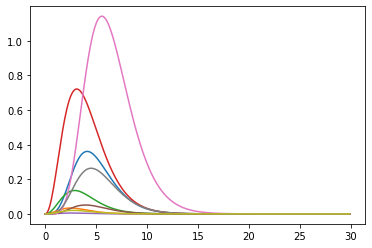

In [14]:
mu = np.arange(0,30,0.1)
for f in [vf1, vf2, vf3, vf4, vf5, vf6, vf7, vf8, vf9]:
    plt.plot(mu, f(mu, 2.1))
plt.show()

In [15]:
for r in np.arange(0.1,14.1,2):
    I_inf = quad(vf3, 0, np.inf, args=(r))
    print(r, I_inf)

0.1 (1.9903486695578718, 5.345660575256455e-10)
2.1 (0.5763387371719357, 3.061228888387369e-10)
4.1 (0.0750300449095397, 1.047540101536959e-10)
6.1 (0.007558650172196092, 9.798588355593307e-12)
8.1 (0.0006708889564274948, 2.081917956719368e-09)
10.1 (5.521008775533834e-05, 2.2782439481533522e-10)
12.1 (4.320647531197234e-06, 2.947215541810639e-10)
